Simple Linear Regression

The objective of this notebook is to show you how to apply the algorithm learnt in the main task to a dataset. In the case of Simple Linear Regression, a good set-up involves importing packages that will help us manipulate data and leverage the easy-to-use machine learning tools of the scikit-learn library.

In [2]:
#py -m pip install scikit-learn
# py -m pip install scipy

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
%matplotlib inline



A linear model describes a linear relationship between an input and output variable. We therefore need to make sure that the problem we are looking to model with Linear Regression indeed has a continuous input and output variable with a linear relationship.


Below we have a scatter plot of the data points. We can observe that the more years of experience an employee has, the higher their salary. This is a linear relationship that can be estimated with simple linear relationship.

In [3]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


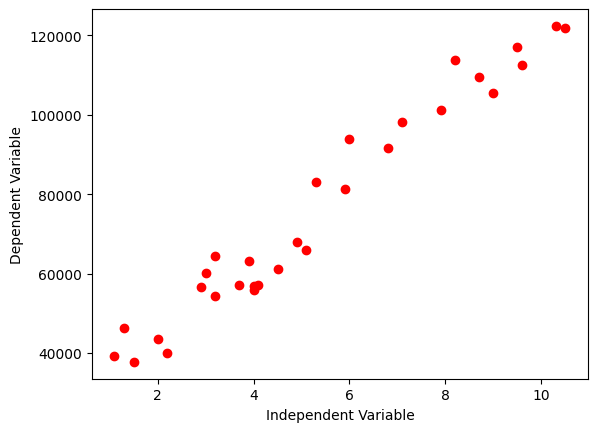

In [4]:
x = data.iloc[:,:1].values
y = data.iloc[:,-1].values

plt.scatter(x,y,color = 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

For comparison, our problem might have no continuous input variables, or the impact of the input on the output variable is not linear, as in this example:

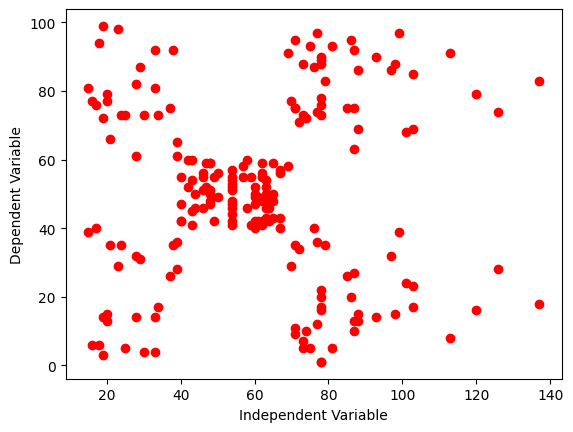

In [5]:
data_notlin = pd.read_csv('Mall_Customers.csv',index_col=0)

x_notlin = data_notlin.loc[:,'Annual Income (k$)'].values
y_notlin = data_notlin.loc[:,'Spending Score (1-100)'].values

plt.scatter(x_notlin,y_notlin,color = 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

The scikit-learn package makes fitting a simple linear regression model very easy:

In [7]:
salary_model = LinearRegression()
salary_model.fit(x,y)

LinearRegression()

What does it mean that we have fitted a model? It means we can make predictions along a line by inputting any x value. We can see how similar those predictions are to the x values we know the corresponding y values for. Below these predictions are shown in red, and the obversed values are in blue.

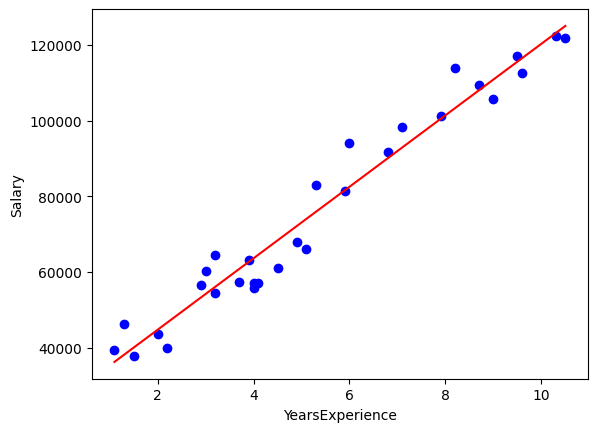

In [8]:
y_pred = salary_model.predict(x)

plt.scatter(x,y,color = 'b')
plt.plot(x,y_pred,color = 'r')
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.show()

If we are happy with this model, we may want to use it to determine how much to pay an employee who has been at the company longer than any previous employee has.

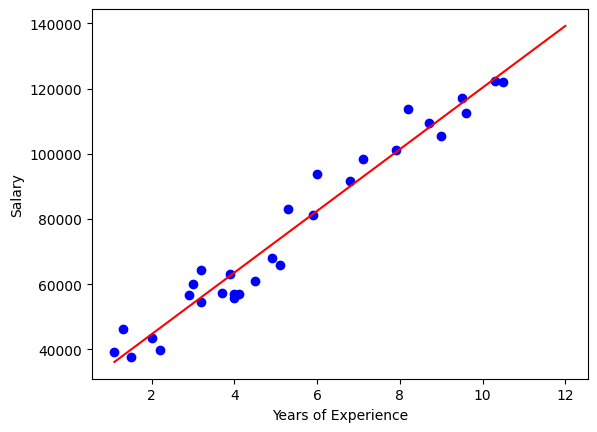

Employee longer than any previous employee should make: [139191.74805613]


In [9]:
speculated_x = [[12]]

x_predicted = np.append(x, speculated_x).reshape(-1,1)
y_predicted = salary_model.predict(x_predicted)

plt.scatter(x,y, color = 'b')
plt.plot(x_predicted, y_predicted, color = 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

print("Employee longer than any previous employee should make:", salary_model.predict(speculated_x))